In [51]:
!wget -O imdb.zip -qq --no-check-certificate "https://drive.google.com/uc?export=download&id=1vrQ5czMHoO3pEnmofFskymXMkq_u1dPc"
!unzip imdb.zip
!pip -q install eli5
!pip -q install spacy
!python -m spacy download en

Archive:  imdb.zip
replace test.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
     |████████████████████████████████| 12.0 MB 8.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [52]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id': '1d1-5FwxK53ePwygNWeG7jhsOWZbi5HOv'})
downloaded.GetContentFile('train_docs.pkl')

downloaded = drive.CreateFile({'id': '1MMOY477t965G0C5DtXeREVp0X85UaNq5'})
downloaded.GetContentFile('test_docs.pkl')

In [53]:
!head train.tsv

is_positive	review
0	"Dreamgirls, despite its fistful of Tony wins in an incredibly weak year on Broadway, has never been what one would call a jewel in the crown of stage musicals. However, that is not to say that in the right cinematic hands it could not be fleshed out and polished into something worthwhile on-screen. Unfortunately, what transfers to the screen is basically a slavishly faithful version of the stage hit with all of its inherent weaknesses intact. First, the score has never been one of the strong points of this production and the film does not change that factor. There are lots of songs (perhaps too many?), but few of them are especially memorable. The closest any come to catchy tunes are the title song and One Night Only - the much acclaimed And I Am Telling You That I Am Not Going is less a great song than it is a dramatic set piece for the character of Effie (Jennifer Hudson). The film is slick and technically well-produced, but the story and characters are surprisi

In [54]:
import pandas as pd

train_df = pd.read_csv("train.tsv", delimiter="\t")
test_df = pd.read_csv("test.tsv", delimiter="\t")

print('Train size = {}'.format(len(train_df)))
print('Test size = {}'.format(len(test_df)))

Train size = 25000
Test size = 25000


In [55]:
train_df

,is_positive,review
0,0,"Dreamgirls, despite its fistful of Tony wins i..."
1,0,This show comes up with interesting locations ...
2,1,I simply love this movie. I also love the Ramo...
3,0,Spoilers ahead if you want to call them that.....
4,1,My all-time favorite movie! I have seen many m...
...,...,...
24995,1,"I am a big fan of the movie, but not for the u..."
24996,0,I'm not going to bother with a plot synopsis s...
24997,0,This movie . . . I don't know. Why they would ...
24998,1,Saw this film on DVD yesterday and was gob-sma...


**Задание** Придумайте хорошие ключевые слова или фразы и наберите хотя бы 71% точности на тесте (и не забудьте посмотреть на код классификации!)

In [56]:
test_df.head()

,is_positive,review
0,0,A formulaic story with all the tired cliches. ...
1,1,This is both an entertaining and a touching ve...
2,0,Corey Haim is never going to be known as one o...
3,1,If you believe that any given war movie can ma...
4,1,Carla Gugino literally melts the screen in thi...


In [57]:
positive_words = 'love', 'great', 'best', 'wonderful'
positive_words

('love', 'great', 'best', 'wonderful')

In [58]:
negative_words = 'worst', 'awful', '1/10', 'crap'
negative_words

('worst', 'awful', '1/10', 'crap')

In [59]:
positives_count = test_df.review.apply(lambda text: sum(word in text for word in positive_words))
positives_count

0        0
1        0
2        1
3        1
4        4
        ..
24995    0
24996    2
24997    1
24998    1
24999    0
Name: review, Length: 25000, dtype: int64

In [60]:
negatives_count = test_df.review.apply(lambda text: sum(word in text for word in negative_words))
negatives_count


0        0
1        0
2        0
3        0
4        0
        ..
24995    0
24996    0
24997    0
24998    0
24999    0
Name: review, Length: 25000, dtype: int64

In [61]:
is_positive = positives_count > negatives_count
is_positive

0        False
1        False
2         True
3         True
4         True
         ...  
24995    False
24996     True
24997     True
24998     True
24999    False
Name: review, Length: 25000, dtype: bool

In [62]:
correct_count = (is_positive == test_df.is_positive).values.sum()
correct_count

16683

In [63]:
accuracy = correct_count / len(test_df)
print('Test accuracy = {:.2%}'.format(accuracy))

Test accuracy = 66.73%


In [64]:
#@title Начинаем классифицировать! { vertical-output: true, display-mode: "form" }
positive_words = 'love', 'great', 'best', 'wonderful', 'refreshing', 'wonderfully', 'funniest', 'surprisingly', 'rare', 'superb', 'excellent', 'incredible', 'perfect', 'delightful', 'good'#@param {type:"raw"}
negative_words = 'worst', 'awful', '1/10', 'crap', 'worse', 'disappointment', 'waste', 'fails', 'pointless', 'mess', 'dull', 'mildly', 'redeeming', 'baldwin', 'wooden', 'horrible', 'save', 'lame', 'mediocre' #@param {type:"raw"}

positives_count = test_df.review.apply(lambda text: sum(word in text for word in positive_words))
negatives_count = test_df.review.apply(lambda text: sum(word in text for word in negative_words))
is_positive = positives_count > negatives_count
correct_count = (is_positive == test_df.is_positive).values.sum()

accuracy = correct_count / len(test_df)

print('Test accuracy = {:.2%}'.format(accuracy))
if accuracy > 0.71:
    from IPython.display import Image, display
    display(Image('https://s3.amazonaws.com/achgen360/t/rmmoZsub.png', width=500))

Test accuracy = 71.49%


/usr/local/lib/python3.7/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'tuple'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

**Задание** Кому-нибудь нравятся эти `<br /><br />`? Лично мне - нет. Напишите регулярку, которая будет их удалять

In [65]:
import re

pattern = re.compile('<br />')

print(train_df['review'].iloc[3])
print(pattern.subn(' ', train_df['review'].iloc[3])[0])

Spoilers ahead if you want to call them that...<br /><br />I would almost recommend this film just so people can truly see a 1/10. Where to begin, we'll start from the top...<br /><br />THE STORY: Don't believe the premise - the movie has nothing to do with abandoned cars, and people finially understanding what the mysterious happenings are. It's a draub, basic, go to cabin movie with no intensity or "effort".<br /><br />THE SCREENPLAY: I usually give credit to indie screenwriters, it's hard work when you are starting out...but this is crap. The story is flat - it leaves you emotionless the entire movie. The dialogue is extremely weak and predictable boasting lines of "Woah, you totally freaked me out" and "I was wondering if you'd uh...if you'd like to..uh, would you come to the cabin with me?". It makes me want to rip out all my hair, one strand at a time and feed it to myself.<br /><br />THE CHARACTERS: HOLY CRAP!!!! Some have described the characters as flat, I want to take it one 

In [66]:
test_df.review = test_df.review.apply(lambda text: pattern.subn(' ', text)[0])
test_df.review[3]

'If you believe that any given war movie can make you really feel the war, you need to see "Letyat zhuravli" (called "The Cranes are Flying" in English). It tells the story of Veronika (Tatiana Samoylova) and Boris (Aleksey Batalov), who are in love on the verge of WWII. They are walking along the waterfront, watching the cranes fly by, when the war starts. Boris is promptly sent off to war. Veronika hides out with a family and ends up marrying the son, whom she does not love. Boris, meanwhile, continues trotting through the countryside, fighting the Nazis and experiencing all the horrors of war, until he he runs out of energy. When Veronika - working in a military hospital - receives this news, she refuses to accept it, until Boris\' body arrives home on one of the trains. Simultaneously, the radio announces that Germany has surrendered and the Allied Powers have won the war; the Soviet Union lost 27 million citizens, but it\'s the start of a new era.  This movie did a very good job s

In [67]:
train_df.review = train_df.review.apply(lambda text: pattern.subn(' ', text)[0])
train_df.review[3]

'Spoilers ahead if you want to call them that...  I would almost recommend this film just so people can truly see a 1/10. Where to begin, we\'ll start from the top...  THE STORY: Don\'t believe the premise - the movie has nothing to do with abandoned cars, and people finially understanding what the mysterious happenings are. It\'s a draub, basic, go to cabin movie with no intensity or "effort".  THE SCREENPLAY: I usually give credit to indie screenwriters, it\'s hard work when you are starting out...but this is crap. The story is flat - it leaves you emotionless the entire movie. The dialogue is extremely weak and predictable boasting lines of "Woah, you totally freaked me out" and "I was wondering if you\'d uh...if you\'d like to..uh, would you come to the cabin with me?". It makes me want to rip out all my hair, one strand at a time and feed it to myself.  THE CHARACTERS: HOLY CRAP!!!! Some have described the characters as flat, I want to take it one step further and say that they ac

**Задание** Попробуйте запустить `TfidfVectorizer`. Посмотрите на ошибки, которые он научился исправлять, и на ошибки, которые он начал делать - по сравнению с `CountVectorizer`.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

def eval_model(model, test_df):
    preds = model.predict(test_df['review'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))
    

vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.28%


In [77]:
import eli5
eli5.show_weights(classifier, vec=vectorizer, top=40)

Weight?,Feature
+7.553,great
+6.153,excellent
+5.121,best
+4.814,perfect
+4.653,wonderful
+4.132,amazing
+4.000,well
+3.837,loved
+3.772,favorite
+3.769,fun


1! Распределение по словам стало более ярко выраженным, то есть классификатор более уверен в том что определнные слова принадлежат к классу позитивных, а другие к классу негативных.

In [79]:
a = eli5.explain_weights(classifier, vec=vectorizer, top=40)

In [85]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


In [86]:
print('Positive' if test_df['is_positive'].iloc[6] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[6], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Negative


2! Распределение по тексту стало менее выраженным, это говорит о том что веса негативных и позитивных слов в предлажении при TfidfVectorizer стремиться к балансу.

In [87]:
import numpy as np

preds = model.predict(test_df['review'])
incorrect_pred_index = np.random.choice(np.where(preds != test_df['is_positive'])[0])

eli5.show_prediction(classifier, test_df['review'].iloc[incorrect_pred_index],
                     vec=vectorizer, targets=['positive'], target_names=['negative', 'positive'])

**Задание** Попробуйте увеличенный range и поинтерпретируйте полученный результат.

In [88]:
vectorizer = TfidfVectorizer(ngram_range=(2, 3))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 86.40%


In [89]:
eli5.show_weights(classifier, vec=vectorizer, top=40)

Weight?,Feature
+5.878,the best
+3.896,is great
+3.802,it is
+3.740,as the
+3.478,of the best
+3.257,one of
+3.027,my favorite
+2.979,of the
+2.766,very good
+2.753,very well


In [90]:
vectorizer = TfidfVectorizer(ngram_range=(3, 4))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 83.30%


In [91]:
eli5.show_weights(classifier, vec=vectorizer, top=40)

Weight?,Feature
+4.399,of the best
+3.809,one of the best
+3.223,one of the
+2.957,is one of
+2.773,one of my
+2.578,as well as
+1.934,is one of the
+1.912,is the best
+1.815,the story of
+1.745,but it is


In [92]:
vectorizer = TfidfVectorizer(ngram_range=(1, 9))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 84.54%


In [93]:
eli5.show_weights(classifier, vec=vectorizer, top=40)

Weight?,Feature
+6.972,and
+6.952,great
+4.056,love
+3.998,best
+3.748,excellent
+3.494,very
+3.416,the best
+3.360,well
+3.260,wonderful
+3.149,his


In [94]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 87.76%


In [95]:
eli5.show_weights(classifier, vec=vectorizer, top=40)

Weight?,Feature
+8.428,great
+6.020,and
+4.999,excellent
+4.560,best
+4.503,love
+4.211,wonderful
+4.112,the best
+4.062,well
+3.722,very
+3.658,perfect


3! Больше N-грамм больше вычеслитильная сложность, по идее если мы берем более высокий нижний порог  N-грамм  то получаем более длинные последовательности слов, которые кстати в Колаб дают результат хуже чем просто одиночные слова. Естественно что без обработки текста в N-граммы попадают вспомогательные частицы. Вспомогательные частицы не несут смысловой нагрузки, то есть по большей части они связывают между собой слова. Было бы интересно посмотреть что будет если делать N-грамм на тексте без эти частиц. Стоит попробовать.

In [96]:
new_train = train_df.copy()

In [97]:
new_test = test_df.copy()

In [99]:
from nltk.corpus import stopwords
nltk.download('stopwords')
en_stops = set(stopwords.words('english'))
def clear_stop_words(text:str):
    text = text.split()
    text = [word for word in text if word not in en_stops]
    return ' '.join(text)
new_train.review = new_train.review.apply(clear_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
new_test.review = new_test.review.apply(clear_stop_words)

In [101]:
new_test.review[0]

'A formulaic story tired cliches. I shocked horrible script became movie! What waste! How many ORIGINAL scripts scattered around without produced? At climax I could predict happen every single shot. Oh, even get started idiotic sexual tension gorgeous female cop paralyzed cop barely move finger. YEAH RIGHT. I CAN BUY THAT. What next? Fingers porn?'

In [102]:
test_df.review[0]

"A formulaic story with all the tired cliches. I was shocked that the horrible script became a movie! What a waste! How many ORIGINAL scripts are scattered around without being produced?    At the climax I could predict what will happen in every single shot.   Oh, and don't even get me started about the idiotic sexual tension between the gorgeous female cop and the paralyzed cop who can barely move a finger. YEAH RIGHT. I CAN BUY THAT. What next? Fingers porn?"

In [103]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(new_train['review'], new_train['is_positive'])

eval_model(model, new_test)

Test accuracy = 87.60%


In [104]:
vectorizer = TfidfVectorizer(ngram_range=(3, 5))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(new_train['review'], new_train['is_positive'])

eval_model(model, new_test)

Test accuracy = 76.56%


4! идеи не оправдались.

**Задание** Запилите классификатор на n-граммах символов и визуализируйте его.

In [105]:
vectorizer = TfidfVectorizer(ngram_range=(2, 6), max_features=20000, analyzer='char')
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test accuracy = 87.86%


In [106]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


In [107]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=20000, analyzer='char')
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 82.68%


In [108]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

Positive


5! Метрики незначительно упали но в определенных условиях это может иметь свое применение. Наверно в текстах где используется сленг.

**Задание** Найти формы слова с разной семантической окраской.


# Поверя, что они есть, попробуем что-нибудь с этим сделать.

Например, лемматизируем - сведем к начальной форме все слова. Поможет в этом библиотека spacy.

In [109]:
import spacy
from spacy import displacy

In [111]:
nlp = spacy.load('en', disable=['parser'])

docs = [doc for doc in nlp.pipe(train_df.review.values[:50])]

In [127]:
same_lemma = {}
for doc in docs:
    for token in doc:
        origin = token.lemma_
        if origin not in same_lemma.keys():
            same_lemma[origin] = []
            same_lemma[origin].append([token.text, token.lemma_, token.ent_iob_, token.ent_type_])
        if origin in same_lemma.keys():
            print(token.lemma_)
            try:
                same_lemma[origin].append([token.text, token.lemma_, token.ent_iob_, token.ent_type_])
            except:
                print('wrong key')
        else:
            print(1)

for key, item in same_lemma.items():
    if len(item) > 3:
        print(key)
        print(item)

Streaming output truncated to the last 5000 lines.
eulogize
and
inter
well
before
the
movie
begin
.
Ms.
Page
have
a
boyfriend
,
but
-PRON-
be
show
next
to
nothing
about
-PRON-
relationship
.
in
fact
,
there
be
no
intimate
or
detailed
relationship
in
the
film
.
  
one
can
not
ignore
-PRON-
smug
simplicity
.
in
New
York
,
where
Ms.
Page
try
-PRON-
good
to
fit
into
and
appease
a
man
's
world
,
let
-PRON-
be
tie
up
in
the
rope
of
bondage
and
tightly
lace
into
the
black
leather
boot
and
bodice
of
S
&
M
,
the
movie
be
black
and
white
.
but
down
in
Miami
,
where
-PRON-
go
to
get
away
from
-PRON-
all
,
gleefully
take
off
-PRON-
clothe
,
and
be
photograph
by
a
"
liberated
"
female
,
the
movie
turn
into
color
.
 
like
hell
Harron
do
not
"
make
feminist
film
,
"
do
not
"
make
anything
ideological
.
"
ideology
have
become
so
internalized
,
so
assume
,
so
program
,
that
-PRON-
be
almost
invisible
.
Big
Brother
must
be
smile
.
Salva
and
-PRON-
pal
Bigardo
have
be
at
the
margin
of
the
law
during
most

In [128]:
same_lemma['Hopper']

[['Hopper', 'Hopper', 'I', 'PERSON'],
 ['Hopper', 'Hopper', 'I', 'PERSON'],
 ['Hopper', 'Hopper', 'B', 'ORG'],
 ['Hopper', 'Hopper', 'B', 'WORK_OF_ART'],
 ['Hopper', 'Hopper', 'B', 'ORG'],
 ['Hopper', 'Hopper', 'B', 'ORG']]

In [135]:
def lamma_spacy(text):
    doc = nlp(text)
    new_text = []
    for token in doc:
        new_text.append(token.lemma_)
    return ' '.join(new_text)

In [136]:
train_df['lem_text'] = train_df.review.apply(lamma_spacy)

In [137]:
test_df['lem_text'] = test_df.review.apply(lamma_spacy)

In [139]:
test_df.head()

,is_positive,review,lem_text
0,0,A formulaic story with all the tired cliches. ...,a formulaic story with all the tired cliche . ...
1,1,This is both an entertaining and a touching ve...,this be both an entertaining and a touching ve...
2,0,Corey Haim is never going to be known as one o...,Corey Haim be never go to be know as one of th...
3,1,If you believe that any given war movie can ma...,if -PRON- believe that any give war movie can ...
4,1,Carla Gugino literally melts the screen in thi...,Carla Gugino literally melt the screen in this...


**Задание** Сделайте классификатор на лемматизированных текстах.

In [141]:
def eval_model(model, test_df):
    preds = model.predict(test_df['lem_text'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))
    

vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['lem_text'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 87.94%


**Задание** Попробуйте вместо лемм классифицировать основы.

In [142]:
from nltk import PorterStemmer

stemmer = PorterStemmer()

def my_stem(text:str): # input str
    words = text.split()
    return [stemmer.stem(word) for word in words]


In [143]:
train_df['stem_text'] = train_df.review.apply(my_stem)
test_df['stem_text'] = test_df.review.apply(my_stem)

In [145]:
train_df['stem_text'] = train_df.review.apply(lambda text: ''.join(text))
test_df['stem_text'] = test_df.review.apply(lambda text: ''.join(text))

In [146]:
def eval_model(model, test_df):
    preds = model.predict(test_df['stem_text'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))
    

vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['stem_text'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.28%


Задание Удалите из текстов какие-то из сущностей, пользуясь координатами из запикленных файлов. 

In [147]:
import pickle

with open('train_docs.pkl', 'rb') as f:
    train_docs = pickle.load(f)
    
with open('test_docs.pkl', 'rb') as f:
    test_docs = pickle.load(f)

In [149]:
type(train_docs)

list

In [160]:
len(train_df)

25000

In [159]:
len(train_docs)

25000

In [170]:
train_docs[0][1]

[(35, 39, 'PERSON'),
 (48, 71, 'DATE'),
 (75, 83, 'FAC'),
 (447, 452, 'ORDINAL'),
 (479, 482, 'CARDINAL'),
 (712, 721, 'TIME'),
 (863, 868, 'PERSON'),
 (870, 885, 'PERSON'),
 (1074, 1086, 'PERSON'),
 (1087, 1095, 'ORG'),
 (1354, 1369, 'PERSON'),
 (1482, 1497, 'PERSON'),
 (1505, 1510, 'ORDINAL'),
 (1525, 1535, 'GPE'),
 (1590, 1602, 'PERSON'),
 (1655, 1666, 'PERSON'),
 (1739, 1743, 'GPE'),
 (1860, 1873, 'ORG'),
 (1885, 1890, 'PERSON'),
 (1898, 1913, 'PERSON'),
 (1937, 1948, 'PERSON'),
 (2057, 2062, 'PERSON'),
 (2311, 2316, 'PERSON'),
 (2697, 2702, 'PERSON'),
 (2816, 2821, 'PERSON'),
 (3199, 3204, 'PERSON'),
 (3580, 3586, 'LOC'),
 (3714, 3719, 'PERSON'),
 (3807, 3813, 'PERSON'),
 (3862, 3867, 'PERSON'),
 (3943, 3949, 'PERSON'),
 (4158, 4162, 'GPE'),
 (4168, 4174, 'ORG'),
 (4252, 4256, 'GPE')]

In [177]:
a = train_df.review[0]
a[35:39]

'Tony'

In [181]:
train_docs[0][1]

[(35, 39, 'PERSON'),
 (48, 71, 'DATE'),
 (75, 83, 'FAC'),
 (447, 452, 'ORDINAL'),
 (479, 482, 'CARDINAL'),
 (712, 721, 'TIME'),
 (863, 868, 'PERSON'),
 (870, 885, 'PERSON'),
 (1074, 1086, 'PERSON'),
 (1087, 1095, 'ORG'),
 (1354, 1369, 'PERSON'),
 (1482, 1497, 'PERSON'),
 (1505, 1510, 'ORDINAL'),
 (1525, 1535, 'GPE'),
 (1590, 1602, 'PERSON'),
 (1655, 1666, 'PERSON'),
 (1739, 1743, 'GPE'),
 (1860, 1873, 'ORG'),
 (1885, 1890, 'PERSON'),
 (1898, 1913, 'PERSON'),
 (1937, 1948, 'PERSON'),
 (2057, 2062, 'PERSON'),
 (2311, 2316, 'PERSON'),
 (2697, 2702, 'PERSON'),
 (2816, 2821, 'PERSON'),
 (3199, 3204, 'PERSON'),
 (3580, 3586, 'LOC'),
 (3714, 3719, 'PERSON'),
 (3807, 3813, 'PERSON'),
 (3862, 3867, 'PERSON'),
 (3943, 3949, 'PERSON'),
 (4158, 4162, 'GPE'),
 (4168, 4174, 'ORG'),
 (4252, 4256, 'GPE')]

In [190]:
def del_all_person(texts:list,ner:list):
    new_texts = []
    for i in range(len(texts)): # we will del all person in every text
        name_to_del = []
        a = texts[i] # chose text from texts
        for coordinate in ner[i][1]: # find ner in index i
             # get touple with coordinate and ner type
            if coordinate[2] == 'PERSON': # if type is person
                name_to_del.append(a[coordinate[0]:coordinate[1]]) # add word to del list
        for name in name_to_del:
            a = a.replace(name, '') # delete all person
        new_texts.append(a)
    
    return new_texts

new_text = del_all_person(train_df.review.tolist(), train_docs)

In [191]:
train_df.review[0][35:39]

'Tony'

In [192]:
new_text[0][35:39]

' win'

In [193]:
train_df['person_out'] = new_text

In [194]:
new_text_t = del_all_person(test_df.review.tolist(), test_docs)

In [195]:
test_df['person_out'] = new_text_t

In [196]:
def eval_model(model, test_df):
    preds = model.predict(test_df['person_out'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))
    

vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['person_out'], train_df['is_positive'])

eval_model(model, test_df)

Test accuracy = 88.43%


**Задание** Сконвертируйте данные

<a list of 231 Patch objects>

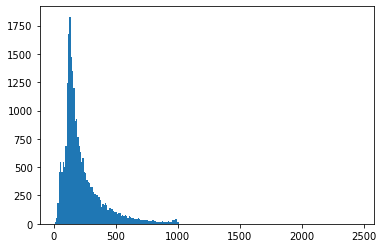

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt

_, _, hist = plt.hist(train_df.review.apply(lambda text: len(text.split())), bins='auto')
hist

In [203]:
from collections import Counter

words_counter = Counter((word for text in train_df.review for word in text.lower().split()))

word2idx = {
    '': 0,
    '<unk>': 1
}
for word, count in words_counter.most_common():
    if count < 10:
        break
        
    word2idx[word] = len(word2idx)
    
print('Words count', len(word2idx))

Words count 26783


In [205]:
def convert(texts, word2idx, max_text_len):
    data = np.zeros((len(texts), max_text_len), dtype=np.int)
    
    for inx, text in enumerate(texts):
        result = []
        for word in text.split():
            if word in word2idx:
                result.append(word2idx[word])
        padding = [0]*(max_text_len - len(result))
        data[inx] = np.array(padding + result[-max_text_len:], dtype=np.int)
    return data

X_train = convert(train_df.review, word2idx, 1000)
X_test = convert(test_df.review, word2idx, 1000)

In [206]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout

In [207]:
model = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=64, input_shape=(X_train.shape[1],)),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dense(units=10, activation='relu'),
    
    Dense(units=1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 64)          1714112   
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,714,883
Trainable params: 1,714,883
Non-trainable params: 0
_________________________________________________________________


In [208]:
model.fit(X_train, train_df.is_positive, batch_size=128, epochs=10, 
          validation_data=(X_test, test_df.is_positive))

Epoch 1/10
196/196 [==============================] - 11s 11ms/step - loss: 0.5825 - accuracy: 0.7126 - val_loss: 0.3855 - val_accuracy: 0.8428
Epoch 2/10
196/196 [==============================] - 2s 8ms/step - loss: 0.2915 - accuracy: 0.8850 - val_loss: 0.3006 - val_accuracy: 0.8698
Epoch 3/10
196/196 [==============================] - 2s 8ms/step - loss: 0.1770 - accuracy: 0.9374 - val_loss: 0.2987 - val_accuracy: 0.8730
Epoch 4/10
196/196 [==============================] - 2s 8ms/step - loss: 0.1004 - accuracy: 0.9696 - val_loss: 0.3335 - val_accuracy: 0.8675
Epoch 5/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0499 - accuracy: 0.9886 - val_loss: 0.3634 - val_accuracy: 0.8672
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0220 - accuracy: 0.9971 - val_loss: 0.4037 - val_accuracy: 0.8647
Epoch 7/10
196/196 [==============================] - 2s 8ms/step - loss: 0.0104 - accuracy: 0.9992 - val_loss: 0.4378 - val_accuracy: 0.8644
Epoc